In [6]:
import matplotlib.image as mpimg
image = mpimg.imread('cat1.jpg')
image.show()

AttributeError: 'numpy.ndarray' object has no attribute 'show'

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
#array
im = np.array(Image.open('cat1.jpg'), dtype=np.uint8)
# Create figure and axes
fig,ax = plt.subplots(1)
# Display the image
ax.imshow(im)


In [57]:
#color_modification
image=Image.open('cat1.jpg')
#image.show()
def colormodification(image):
    for x in range(image.size[0]):
        for y in range(image.size[1]):
            r,g,b=image.getpixel((x,y))
            image.putpixel((x,y),(r//10,g//10,b//10))
    return np.array(image)
colormodification(image)

array([[[ 2,  1,  2],
        [ 2,  1,  2],
        [ 2,  1,  2],
        ...,
        [ 8,  4,  3],
        [ 8,  4,  3],
        [ 5,  1,  1]],

       [[ 1,  1,  2],
        [ 1,  1,  2],
        [ 1,  1,  2],
        ...,
        [ 7,  3,  3],
        [ 7,  3,  3],
        [ 8,  4,  3]],

       [[ 1,  0,  1],
        [ 1,  0,  1],
        [ 1,  0,  1],
        ...,
        [ 6,  2,  2],
        [ 6,  2,  2],
        [ 8,  4,  4]],

       ...,

       [[ 2,  1,  1],
        [ 2,  1,  1],
        [ 1,  1,  1],
        ...,
        [13, 11,  9],
        [15, 13, 10],
        [14, 11,  9]],

       [[ 1,  1,  1],
        [ 1,  0,  1],
        [ 1,  0,  1],
        ...,
        [14, 13, 10],
        [13, 11,  9],
        [12, 10,  8]],

       [[ 1,  1,  2],
        [ 1,  1,  2],
        [ 1,  1,  2],
        ...,
        [14, 13, 10],
        [11,  9,  7],
        [10,  8,  6]]], dtype=uint8)

In [181]:
# Create a Grayscale version of the image
def convert_grayscale(image):
  # Get size
  width, height = image.size

  # Create new Image and a Pixel Map
  new = create_image(width, height)
  pixels = new.load()

  # Transform to grayscale
  for i in range(width):
    for j in range(height):
      # Get Pixel
      pixel = get_pixel(image, i, j)

      # Get R, G, B values (This are int from 0 to 255)
      red =   pixel[0]
      green = pixel[1]
      blue =  pixel[2]

      # Transform to grayscale
      gray = (red * 0.299) + (green * 0.587) + (blue * 0.114)

      # Set Pixel in new image
      pixels[i, j] = (int(gray), int(gray), int(gray))

    # Return new image
    return new
img=convert_grayscale(image)
img.show()

TypeError: cannot unpack non-iterable int object

In [24]:
def naivezoom(im, px, py, zf, bg):
    out = Image.new(im.mode, im.size)        
    pix = out.load()
    iw, ih = im.size
    for x in range(iw):
        for y in range(ih):
            xorg = x + zf*(px - x)
            yorg = y + zf*(py - y)
            if xorg >= 0 and xorg < iw and yorg >= 0 and yorg < ih:
                pix[x,y] = im.getpixel( (xorg , yorg) )
            else:
                pix[x,y] = bg
    return out
naivezoom(image)

TypeError: naivezoom() missing 4 required positional arguments: 'px', 'py', 'zf', and 'bg'

[[[11  6 10]
  [11  6 10]
  [11  6 10]
  ...
  [36  8  4]
  [39 11  7]
  [36  8  4]]

 [[ 9  4  8]
  [ 9  4  8]
  [ 9  4  8]
  ...
  [44 16 12]
  [44 16 12]
  [46 18 14]]

 [[ 7  3  4]
  [ 7  3  4]
  [ 7  3  4]
  ...
  [41 13  9]
  [43 15 11]
  [48 20 16]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


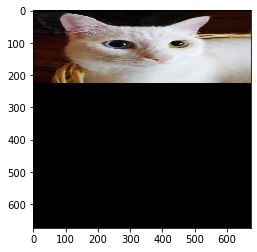

In [25]:
from PIL import Image
import numpy as np
image = np.asarray(Image.open("cat1.jpg"))
import matplotlib.pyplot as plt
# create new image of correct size
m = len(image[0])
n = len(image)
factor = 3
new_image = np.zeros((factor*(n-1) + 1,factor*(m-1) + 1,3), dtype=int)

# implement row zooming
for i in range(n):
    row = image[i]
    for k in range(len(row)-1):
        new_image[i][k*factor], new_image[i][(k+1)*factor] = row[k], row[k+1]
        for mode in range(3):
            # need mode as three colour channels in RGB

            lo = int(min(row[k][mode], row[k+1][mode]))
            hi = int(max(row[k][mode], row[k+1][mode]))
            diff = int((hi-lo)//factor)
            for x in range(factor-1):
                new_image[i][k*factor+1+x][mode] = lo + (x*diff)
plt.imshow(new_image, interpolation='nearest')

print(new_image)



array([[[ 17,  16,  21],
        [ 16,  15,  20],
        [ 17,  16,  21],
        ...,
        [148, 134, 107],
        [113,  97,  71],
        [104,  83,  62]],

       [[ 19,  10,  11],
        [ 18,   9,  10],
        [ 18,   9,  10],
        ...,
        [149, 133, 108],
        [131, 115,  90],
        [128, 101,  84]],

       [[ 21,  11,  12],
        [ 21,  11,  12],
        [ 19,  10,  11],
        ...,
        [135, 119,  94],
        [150, 134, 109],
        [143, 116,  99]],

       ...,

       [[ 13,   7,  17],
        [ 13,   7,  17],
        [ 13,   7,  17],
        ...,
        [ 68,  27,  25],
        [ 67,  26,  24],
        [ 84,  43,  41]],

       [[ 17,  11,  21],
        [ 17,  11,  21],
        [ 17,  11,  21],
        ...,
        [ 76,  35,  33],
        [ 76,  35,  33],
        [ 81,  40,  38]],

       [[ 23,  17,  29],
        [ 23,  17,  29],
        [ 23,  17,  29],
        ...,
        [ 82,  41,  39],
        [ 82,  41,  39],
        [ 55,  14,  12]]

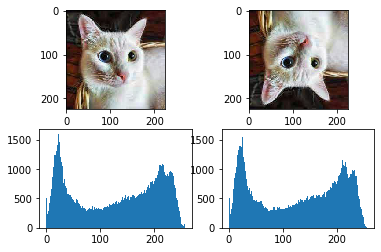

In [18]:
#vertical flipping
image=np.asarray(Image.open("cat1.jpg"))
def vertical_flipping(image):
    flip_v=image[-1::-1,::]
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(image)
    ax[0][1].imshow( flip_v)
    ax[1][0].hist(image.ravel(),256,[0,256])
    ax[1][1].hist(flip_v.ravel(),256,[0,256])
    return flip_v
vertical_flipping(image)


array([[[ 55,  14,  12],
        [ 82,  41,  39],
        [ 82,  41,  39],
        ...,
        [ 23,  17,  29],
        [ 23,  17,  29],
        [ 23,  17,  29]],

       [[ 81,  40,  38],
        [ 76,  35,  33],
        [ 76,  35,  33],
        ...,
        [ 17,  11,  21],
        [ 17,  11,  21],
        [ 17,  11,  21]],

       [[ 84,  43,  41],
        [ 67,  26,  24],
        [ 68,  27,  25],
        ...,
        [ 13,   7,  17],
        [ 13,   7,  17],
        [ 13,   7,  17]],

       ...,

       [[143, 116,  99],
        [150, 134, 109],
        [135, 119,  94],
        ...,
        [ 19,  10,  11],
        [ 21,  11,  12],
        [ 21,  11,  12]],

       [[128, 101,  84],
        [131, 115,  90],
        [149, 133, 108],
        ...,
        [ 18,   9,  10],
        [ 18,   9,  10],
        [ 19,  10,  11]],

       [[104,  83,  62],
        [113,  97,  71],
        [148, 134, 107],
        ...,
        [ 17,  16,  21],
        [ 16,  15,  20],
        [ 17,  16,  21]]

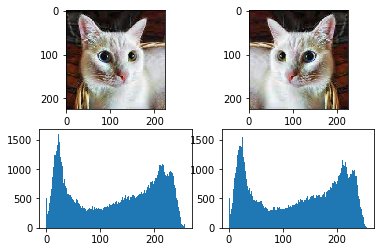

In [17]:
#Horizontal_flipping
image=np.asarray(Image.open("cat1.jpg"))
def Horizonta_flipping(image):
    flip_h=image[:,::-1]
    #plt.imshow(flip_v, interpolation='nearest')
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(image)
    ax[0][1].imshow(flip_h)
    ax[1][0].hist(image.ravel(),256,[0,256])
    ax[1][1].hist(flip_h.ravel(),256,[0,256])
    return flip_h
Horizonta_flipping(image)

array([[[148, 136, 146],
        [190, 179, 187],
        [195, 184, 192],
        ...,
        [210, 207, 202],
        [194, 191, 186],
        [184, 181, 176]],

       [[149, 136, 146],
        [191, 180, 188],
        [197, 186, 194],
        ...,
        [215, 212, 207],
        [201, 198, 193],
        [188, 185, 180]],

       [[149, 136, 145],
        [200, 189, 197],
        [187, 176, 184],
        ...,
        [214, 213, 209],
        [202, 201, 197],
        [186, 185, 181]],

       ...,

       [[132, 133, 125],
        [133, 134, 126],
        [154, 155, 147],
        ...,
        [213, 214, 218],
        [206, 207, 211],
        [200, 201, 205]],

       [[118, 121, 114],
        [117, 120, 113],
        [153, 156, 149],
        ...,
        [217, 218, 222],
        [209, 210, 214],
        [203, 204, 208]],

       [[107, 114, 107],
        [110, 115, 109],
        [151, 154, 147],
        ...,
        [216, 217, 221],
        [208, 209, 213],
        [202, 203, 207]]

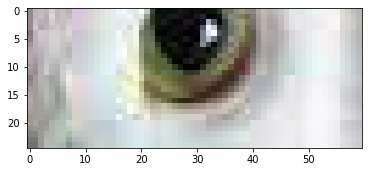

In [15]:
#cropping
def cropping (image):
    crop=image[100:125,120:180]
    plt.imshow(crop)
    return crop
cropping(image)

array([[[0.        , 0.22239582, 0.15941655],
        [0.        , 0.35366947, 0.42269541],
        [0.22659772, 0.13883402, 0.04205395],
        ...,
        [0.        , 0.13779411, 0.        ],
        [0.04162909, 0.37152621, 0.08287758],
        [0.35649695, 0.20830148, 0.        ]],

       [[0.5791502 , 0.44871267, 0.08491553],
        [0.26969674, 0.14201341, 0.07508911],
        [0.        , 0.02434033, 0.        ],
        ...,
        [0.05286371, 0.25787867, 0.36946172],
        [0.49882064, 0.        , 0.26139428],
        [0.58604726, 0.13640315, 0.29576132]],

       [[0.1616492 , 0.10184893, 0.12378537],
        [0.        , 0.02021797, 0.34339435],
        [0.10063386, 0.22197916, 0.05049677],
        ...,
        [0.181886  , 0.22256021, 0.12855893],
        [0.        , 0.2647278 , 0.        ],
        [0.34289015, 0.17564613, 0.        ]],

       ...,

       [[0.11102321, 0.06181843, 0.        ],
        [0.        , 0.        , 0.27379726],
        [0.        , 0

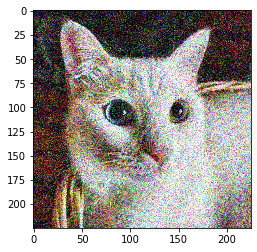

In [36]:
#light gaussian noise
import numpy as np
import cv2
import matplotlib.pyplot as plt
def noise(img,par):
    img=img[...,::-1]/255.0
    noise =np.random.normal(loc=0, scale=1, size=img.shape)
    # noise overlaid over image
    noisy = np.clip((img + noise*par),0,1)
    fig,ax = plt.subplots(1)
    # Display the image
    ax.imshow(noisy)
    return noisy
image = cv2.imread('cat1.jpg')

noise(image,0.2)   

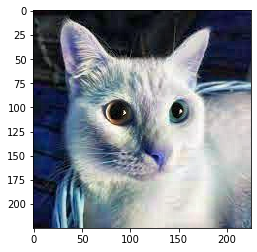

In [48]:
import cv2
image
image = cv2.imread("cat1.jpg")
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
b = clahe.apply(image[:, :, 0])
g = clahe.apply(image[:, :, 1])
r = clahe.apply(image[:, :, 2])
equalized = np.dstack((b, g, r))
cv2.imwrite('cat1.jpg', equalized) 
fig,ax = plt.subplots(1)
# Display the image
ax.imshow(image)

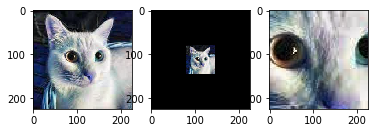

In [43]:
#zoom
def scale(im, nR, nC):
    number_rows = len(im)     # source number of rows 
    number_columns = len(im[0])  # source number of columns 
    return [[ im[int(number_rows * r / nR)][int(number_columns * c / nC)]  for c in range(nC)] for r in range(nR)]

def zoom(img, zoom_factor=0):
    if zoom_factor == 0:
        return img
    height, width = img.shape[:2] # It's also the final desired shape
    new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)

    ### Crop only the part that will remain in the result (more efficient)
    # Centered bbox of the final desired size in resized (larger/smaller) image coordinates
    y1, x1 = max(0, new_height - height) // 2, max(0, new_width - width) // 2
    y2, x2 = y1 + height, x1 + width
    bbox = np.array([y1,x1,y2,x2])
    # Map back to original image coordinates
    bbox = (bbox / zoom_factor).astype(np.int)
    y1, x1, y2, x2 = bbox
    cropped_img = img[y1:y2, x1:x2]
    # Handle padding when downscaling
    resize_height, resize_width = min(new_height, height), min(new_width, width)
    pad_height1, pad_width1 = (height - resize_height) // 2, (width - resize_width) //2
    pad_height2, pad_width2 = (height - resize_height) - pad_height1, (width - resize_width) - pad_width1
    pad_spec = [(pad_height1, pad_height2), (pad_width1, pad_width2)] + [(0,0)] * (img.ndim - 2)
    result = scale(cropped_img, resize_width, resize_height)
    result = np.pad(result, pad_spec, mode='constant')
    #assert result.shape[0] == height and result.shape[1] == width
    return result
zm1 = zoom(img, 0.3)
zm2 = zoom(img, 3)
fig, ax =plt.subplots(1, 3)
ax[0].imshow(img)
ax[1].imshow(zm1)
ax[2].imshow(zm2)




array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [ 35,  21,   7],
        [ 39,  23,   7],
        ...,
        [208, 209, 213],
        [209, 210, 214],
        [209, 210, 214]],

       [[  0,   0,   0],
        [ 52,  37,  19],
        [ 57,  40,  20],
        ...,
        [207, 208, 212],
        [208, 209, 213],
        [208, 209, 213]],

       [[  0,   0,   0],
        [ 63,  47,  28],
        [ 70,  52,  30],
        ...,
        [206, 207, 211],
        [208, 209, 213],
        [208, 209, 213]]

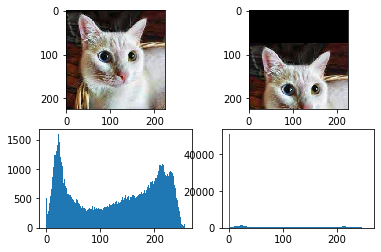

In [13]:
#translation along y
def translation_along_y(image):
    height, width = image.shape[:2]
    quarter_height, quarter_width = height /3 , width/200
    T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
    # We use warpAffine to transform
    # the image using the matrix, T
    img_translation = cv2.warpAffine(image, T, (width, height))
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(image)
    ax[0][1].imshow(img_translation)
    ax[1][0].hist(image.ravel(),256,[0,256])
    ax[1][1].hist(np.array(img_translation).ravel(),256,[0,256])
    return img_translation
image=np.array(Image.open("cat1.jpg"))
#image = cv2.imread("cat1.jpg")   
translation_along_y(image)

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[19, 10,  9],
        [18, 10,  8],
        [18, 10,  8],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[23, 13, 11],
        [23, 13, 11],
        [22, 12, 10],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[90, 91, 80],
        [92, 89, 80],
        [95, 90, 79],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[89, 90, 79],
        [92, 88, 79],
        [94, 89, 78],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[89, 90, 79],
        [92, 88, 79],
        [94, 89, 78],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

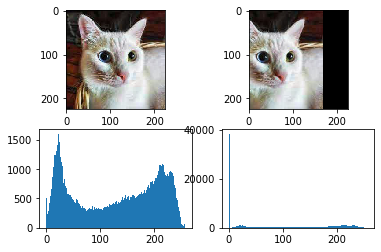

In [12]:
#translation along x
def translation_along_x(image):
    # Store height and width of the image
    height, width = image.shape[:2]
    quarter_height, quarter_width = height /200 , width/-4
    T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
    # We use warpAffine to transfor
    # the image using the matrix, T
    img_translation = cv2.warpAffine(image, T, (width, height))
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(image)
    ax[0][1].imshow(img_translation)
    ax[1][0].hist(image.ravel(),256,[0,256])
    ax[1][1].hist(np.array(img_translation).ravel(),256,[0,256])
    return img_translation
image=np.array(Image.open("cat1.jpg"))
translation_along_x(image)    
    

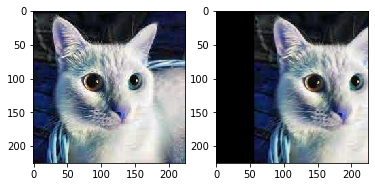

In [93]:
#translation along x
image = cv2.imread("cat1.jpg")
# Store height and width of the image
height, width = image.shape[:2]
quarter_height, quarter_width = height /200 , width/4
  
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
  
# We use warpAffine to transform
# the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[1].imshow(img_translation)

array([[[ 55,  14,  12],
        [ 81,  40,  38],
        [ 84,  43,  41],
        ...,
        [143, 116,  99],
        [128, 101,  84],
        [104,  83,  62]],

       [[ 82,  41,  39],
        [ 76,  35,  33],
        [ 67,  26,  24],
        ...,
        [150, 134, 109],
        [131, 115,  90],
        [113,  97,  71]],

       [[ 82,  41,  39],
        [ 76,  35,  33],
        [ 68,  27,  25],
        ...,
        [135, 119,  94],
        [149, 133, 108],
        [148, 134, 107]],

       ...,

       [[ 23,  17,  29],
        [ 17,  11,  21],
        [ 13,   7,  17],
        ...,
        [ 19,  10,  11],
        [ 18,   9,  10],
        [ 17,  16,  21]],

       [[ 23,  17,  29],
        [ 17,  11,  21],
        [ 13,   7,  17],
        ...,
        [ 21,  11,  12],
        [ 18,   9,  10],
        [ 16,  15,  20]],

       [[ 23,  17,  29],
        [ 17,  11,  21],
        [ 13,   7,  17],
        ...,
        [ 21,  11,  12],
        [ 19,  10,  11],
        [ 17,  16,  21]]

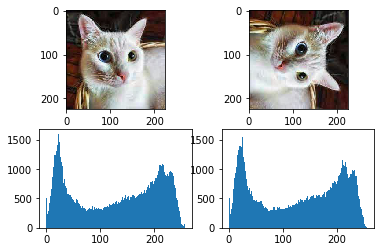

In [5]:
#random rotation
def rotation(img):
    #Image.fromarray(np.rot90(img)).save("rotate_cat.jpg")
    rot_image=Image.fromarray(np.rot90(img,np.random.randint(1,4)))
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(img)
    ax[0][1].imshow(rot_image)
    ax[1][0].hist(img.ravel(),256,[0,256])
    ax[1][1].hist(np.array(rot_image).ravel(),256,[0,256])
    return (np.rot90(img,np.random.randint(1,4)))
img=np.array(Image.open("cat1.jpg"))
rotation(img)
#Image.fromarray(img)


array([[[211, 226, 231],
        [219, 232, 238],
        [212, 219, 225],
        ...,
        [ 59,  41,  41],
        [ 41,  23,  21],
        [ 46,  21,  16]],

       [[210, 228, 230],
        [196, 210, 213],
        [192, 202, 204],
        ...,
        [ 52,  34,  32],
        [ 51,  33,  29],
        [ 43,  18,  14]],

       [[197, 215, 217],
        [197, 212, 215],
        [198, 209, 211],
        ...,
        [ 63,  45,  41],
        [ 62,  47,  42],
        [ 41,  15,  14]],

       ...,

       [[152, 140, 124],
        [150, 137, 121],
        [147, 134, 118],
        ...,
        [233, 233, 231],
        [234, 233, 231],
        [226, 228, 215]],

       [[167, 158, 141],
        [166, 154, 138],
        [162, 150, 134],
        ...,
        [234, 234, 232],
        [234, 233, 231],
        [226, 228, 215]],

       [[174, 167, 151],
        [170, 161, 146],
        [163, 154, 139],
        ...,
        [237, 236, 234],
        [237, 236, 234],
        [236, 238, 227]]

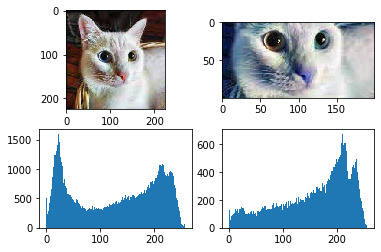

In [10]:
#cropping 
import cv2
def cropping(img,x,y,h,w):
    crop_img = img[y:y+h, x:x+w]
    Image.fromarray(crop_img)
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(image)
    ax[0][1].imshow(crop_img)
    ax[1][0].hist(image.ravel(),256,[0,256])
    ax[1][1].hist(crop_img.ravel(),256,[0,256])
img = cv2.imread("cat1.jpg")
cropping(img,20,80,100,200)   
#2 éme méthode
def random_crop(image, crop_size):
    #crop_size = check_size(cropsize)
    h, w,  = image.shape[:2]
    top = np.random.randint(0, h - crop_size[0])
    left = np.random.randint(0, w - crop_size[1])
    bottom = top + crop_size[0]
    right = left + crop_size[1]
    image = image[top:bottom, left:right, :]
    #return  Image.fromarray(image)
    return image
random_crop(image, [100,120])


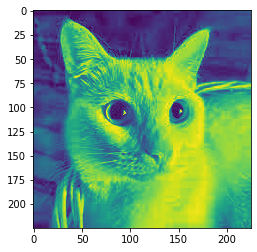

In [7]:
import cv2
import numpy as np
def get_illumination_channel(I, w):
    M, N, = I.shape[:2]
    padded = np.pad(I, ((int(w/2), int(w/2)), (int(w/2), int(w/2)), (0, 0)), 'edge')
    darkch = np.zeros((M, N))
    brightch = np.zeros((M, N))
    for i, j in np.ndindex(darkch.shape):
        #darkch[i, j]  =  np.min(padded[i:i + w, j:j + w, :])
        brightch[i, j] = np.max(padded[i:i + w, j:j + w, :]) 
    return brightch
image=cv2.imread("cat1.jpg")
#plt.imshow(image)
i=get_illumination_channel(image, 1)
plt.imshow(i)

array([[[ 76,  65,  85],
        [ 76,  65,  85],
        [ 76,  65,  85],
        ...,
        [144, 102,  99],
        [144, 102,  99],
        [118,  59,  55]],

       [[ 65,  52,  73],
        [ 65,  52,  73],
        [ 65,  52,  73],
        ...,
        [139,  94,  91],
        [139,  94,  91],
        [143, 100,  98]],

       [[ 57,  42,  65],
        [ 57,  42,  65],
        [ 57,  42,  65],
        ...,
        [131,  82,  79],
        [130,  81,  78],
        [146, 104, 102]],

       ...,

       [[ 73,  52,  55],
        [ 73,  52,  55],
        [ 69,  50,  52],
        ...,
        [185, 174, 154],
        [195, 184, 166],
        [190, 171, 158]],

       [[ 69,  50,  52],
        [ 67,  47,  50],
        [ 67,  47,  50],
        ...,
        [194, 184, 165],
        [182, 171, 151],
        [180, 160, 146]],

       [[ 65,  63,  73],
        [ 63,  61,  71],
        [ 65,  63,  73],
        ...,
        [194, 184, 165],
        [169, 157, 134],
        [162, 145, 125]]

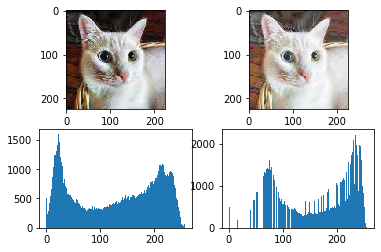

In [8]:
#adding_illumination
def adding_illumination(image, gamma=1.0):
    invGamma= 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(image)
    ax[0][1].imshow(cv2.LUT(image, table))
    ax[1][0].hist(image.ravel(),256,[0,256])
    ax[1][1].hist(cv2.LUT(image, table).ravel(),256,[0,256])
    return cv2.LUT(image, table)
image = np.array(Image.open('cat1.jpg'), dtype=np.uint8)
adding_illumination(image,2)

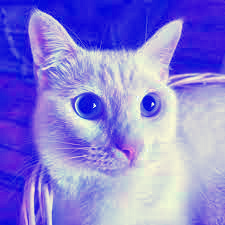

In [32]:
def color_modification(image,n):
    image[image[:, :, 2] < 255, 2] = n
    return image
image = np.array(Image.open('cat1.jpg'), dtype=np.uint8)
Image.fromarray(color_modification(image,np.random.randint(1,255)))

In [33]:
import os
import cv2
from PIL import Image
import numpy as np
import cv2
import pandas as pd  
import matplotlib.pyplot as plt

In [12]:
def rotation(img):
    #Image.fromarray(np.rot90(img)).save("rotate_cat.jpg")
    rot_image=Image.fromarray(np.rot90(img,np.random.randint(1,4)))
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(img)
    ax[0][1].imshow(rot_image)
    ax[1][0].hist(img.ravel(),256,[0,256])
    ax[1][1].hist(np.array(rot_image).ravel(),256,[0,256])
    return (np.rot90(img,np.random.randint(1,4)))
def color_modification(image,n):
    image[image[:, :, 2] < 255, 2] = n
    return image
def random_crop(image, crop_size):
    #crop_size = check_size(cropsize)
    h, w,  = image.shape[:2]
    top = np.random.randint(0, h - crop_size[0])
    left = np.random.randint(0, w - crop_size[1])
    bottom = top + crop_size[0]
    right = left + crop_size[1]
    image = image[top:bottom, left:right, :]
    #return  Image.fromarray(image)
    return image
def adding_illumination(image, gamma=1.0):
    invGamma= 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(image)
    ax[0][1].imshow(cv2.LUT(image, table))
    ax[1][0].hist(image.ravel(),256,[0,256])
    ax[1][1].hist(cv2.LUT(image, table).ravel(),256,[0,256])
    return cv2.LUT(image, table)
def translation_along_x(image):
    # Store height and width of the image
    height, width = image.shape[:2]
    quarter_height, quarter_width = height /200 , width/-4
    T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
    # We use warpAffine to transfor
    # the image using the matrix, T
    img_translation = cv2.warpAffine(image, T, (width, height))
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(image)
    ax[0][1].imshow(img_translation)
    ax[1][0].hist(image.ravel(),256,[0,256])
    ax[1][1].hist(np.array(img_translation).ravel(),256,[0,256])
    return img_translation
def translation_along_y(image):
    height, width = image.shape[:2]
    quarter_height, quarter_width = height /3 , width/200
    T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
    # We use warpAffine to transform
    # the image using the matrix, T
    img_translation = cv2.warpAffine(image, T, (width, height))
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(image)
    ax[0][1].imshow(img_translation)
    ax[1][0].hist(image.ravel(),256,[0,256])
    ax[1][1].hist(np.array(img_translation).ravel(),256,[0,256])
    return img_translation
def noise(img,par):
    img=img[...,::-1]/255.0
    noise =np.random.normal(loc=0, scale=1, size=img.shape)
    # noise overlaid over image
    noisy = np.clip((img + noise*par),0,1)
    fig,ax = plt.subplots(1)
    # Display the image
    ax.imshow(noisy)
    return noisy
def scale(im, nR, nC):
    number_rows = len(im)     # source number of rows 
    number_columns = len(im[0])  # source number of columns 
    return [[ im[int(number_rows * r / nR)][int(number_columns * c / nC)]  for c in range(nC)] for r in range(nR)]

def zoom(img, zoom_factor=0):
    if zoom_factor == 0:
        return img
    height, width = img.shape[:2] # It's also the final desired shape
    new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)

    ### Crop only the part that will remain in the result (more efficient)
    # Centered bbox of the final desired size in resized (larger/smaller) image coordinates
    y1, x1 = max(0, new_height - height) // 2, max(0, new_width - width) // 2
    y2, x2 = y1 + height, x1 + width
    bbox = np.array([y1,x1,y2,x2])
    # Map back to original image coordinates
    bbox = (bbox / zoom_factor).astype(np.int)
    y1, x1, y2, x2 = bbox
    cropped_img = img[y1:y2, x1:x2]
    # Handle padding when downscaling
    resize_height, resize_width = min(new_height, height), min(new_width, width)
    pad_height1, pad_width1 = (height - resize_height) // 2, (width - resize_width) //2
    pad_height2, pad_width2 = (height - resize_height) - pad_height1, (width - resize_width) - pad_width1
    pad_spec = [(pad_height1, pad_height2), (pad_width1, pad_width2)] + [(0,0)] * (img.ndim - 2)
    result = scale(cropped_img, resize_width, resize_height)
    result = np.pad(result, pad_spec, mode='constant')
    #assert result.shape[0] == height and result.shape[1] == width
    return result
def cropping (image):
    crop=image[100:125,120:180]
    plt.imshow(crop)
    return crop
def Horizonta_flipping(image):
    flip_h=image[:,::-1]
    #plt.imshow(flip_v, interpolation='nearest')
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(image)
    ax[0][1].imshow(flip_h)
    ax[1][0].hist(image.ravel(),256,[0,256])
    ax[1][1].hist(flip_h.ravel(),256,[0,256])
    return flip_h
def vertical_flipping(image):
    flip_v=image[-1::-1,::]
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(image)
    ax[0][1].imshow( flip_v)
    ax[1][0].hist(image.ravel(),256,[0,256])
    ax[1][1].hist(flip_v.ravel(),256,[0,256])
    return flip_v

C:\Users\bilel\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\bilel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\bilel\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this

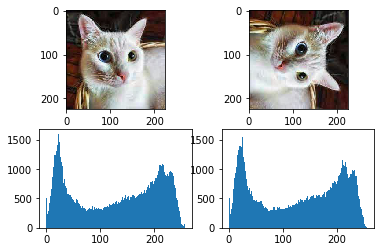

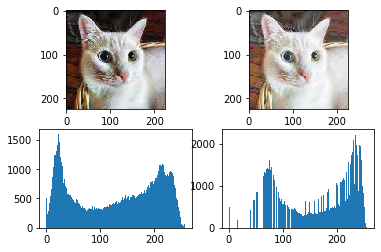

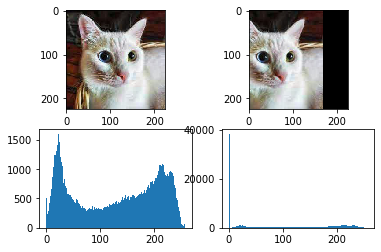

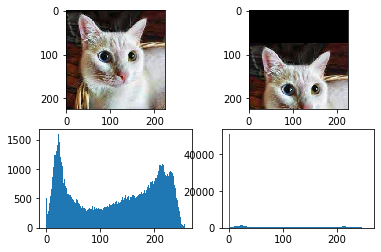

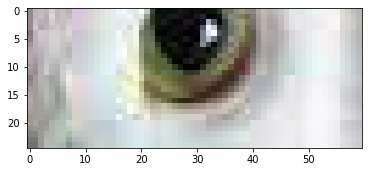

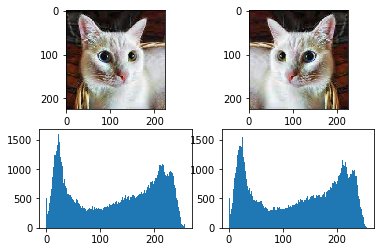

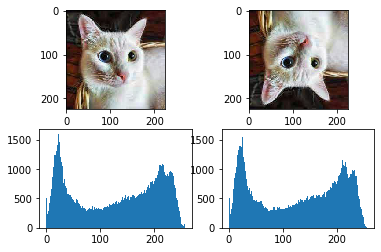

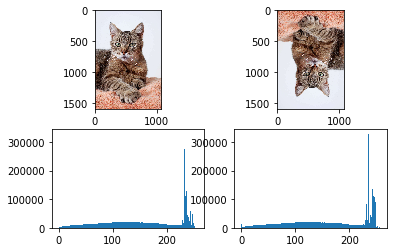

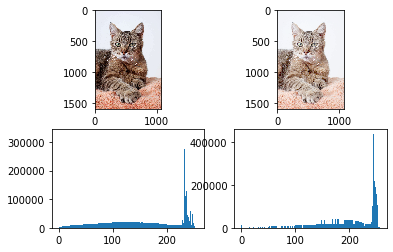

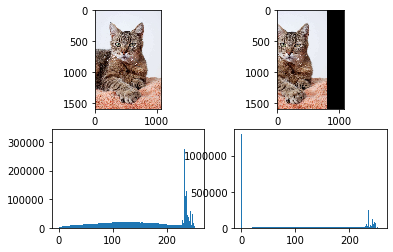

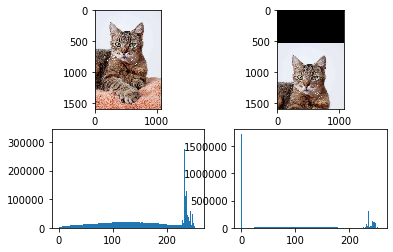

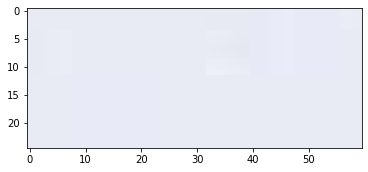

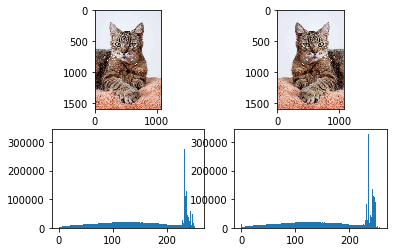

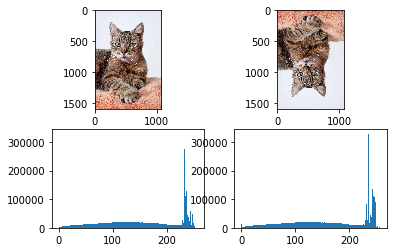

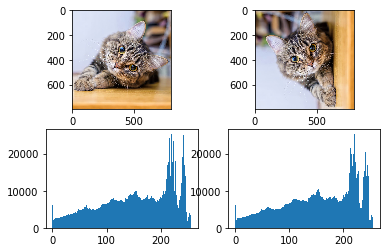

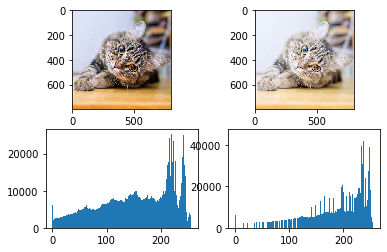

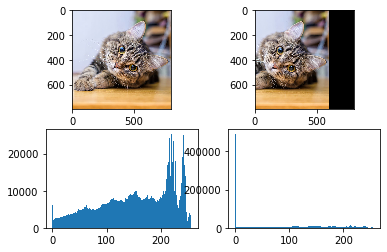

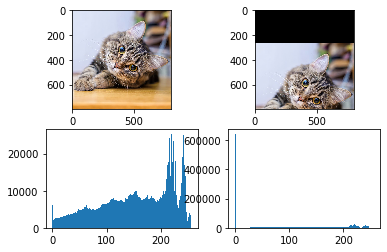

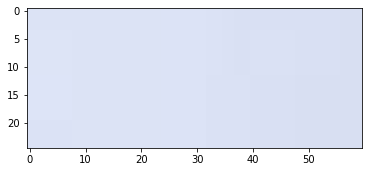

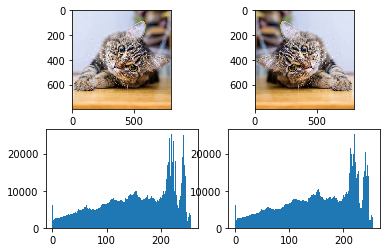

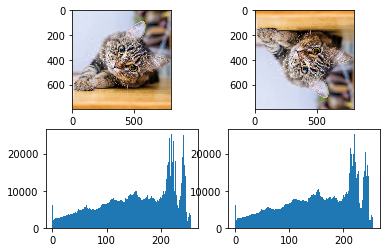

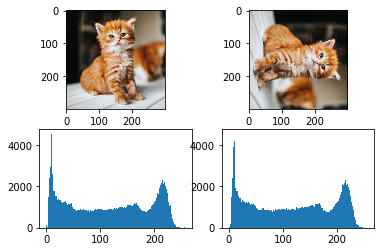

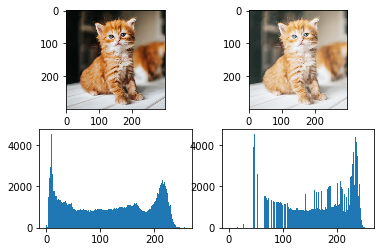

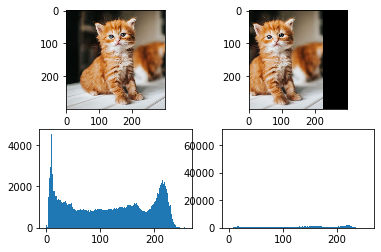

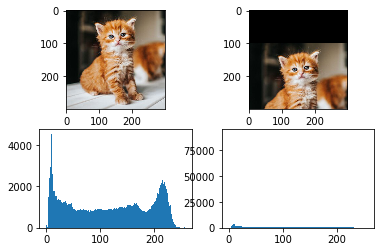

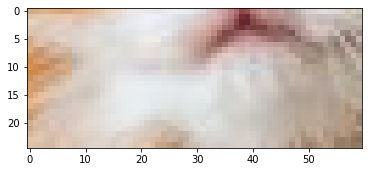

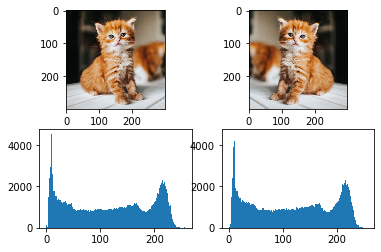

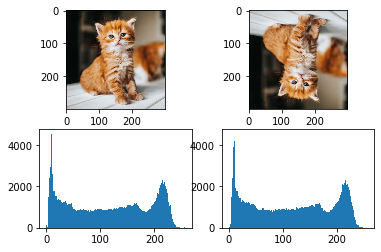

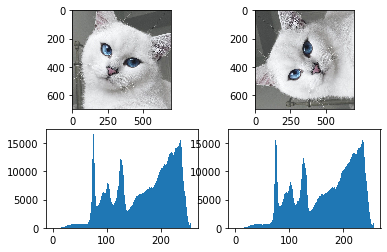

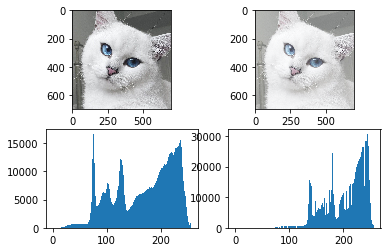

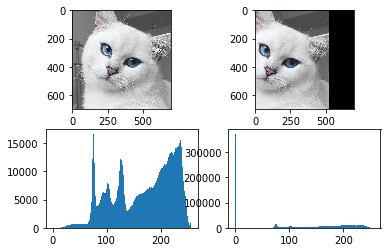

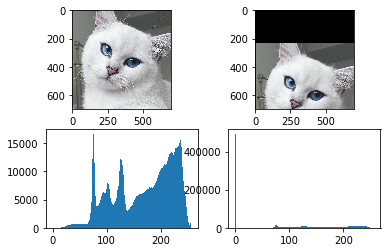

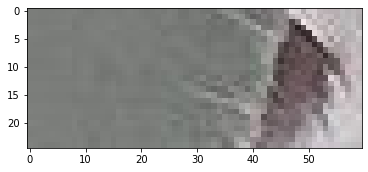

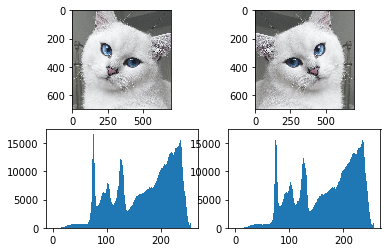

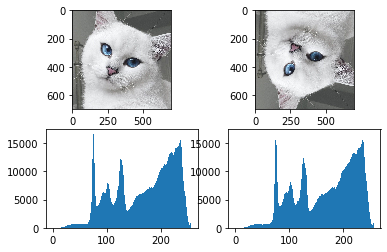

In [13]:
#cats
directory="C:/Users/bilel/OneDrive/Documents/Documents/Dauphine/2021/sems1/python/Data_Augmentation/images/cats"
directory_save="C:/Users/bilel/OneDrive/Documents/Documents/Dauphine/2021/sems1/python/Data_Augmentation/train/cats/"
directory_save_test="C:/Users/bilel/OneDrive/Documents/Documents/Dauphine/2021/sems1/python/Data_Augmentation/test/cats/"
def application_transformation(directory,directory_save,directory_save_test):
    i=0
    for filename in os.listdir(directory):
        i+=1
        image = Image.open(directory+"/"+filename)
        image=image.resize((300,300))
        image.save(directory_save+filename)
        #image = Image.open(directory+"/"+filename)
        im=np.array(Image.open(directory+"/"+filename), dtype=np.uint8)
        Image.fromarray(rotation(im)).save(directory_save+"Image_rotation"+str(i)+".jpg",'JPEG')
        Image.fromarray(random_crop(im, [100,120])).save(directory_save+"Image_crop"+str(i)+".jpg",'JPEG')
        Image.fromarray(adding_illumination(im,2)).save(directory_save+"Image_illumination"+str(i)+".jpg",'JPEG')
        Image.fromarray(translation_along_x(im)).save(directory_save+"Image_translation_along_x"+str(i)+".jpg",'JPEG')
        Image.fromarray(translation_along_y(im)).save(directory_save+"Image_translation_along_y"+str(i)+".jpg",'JPEG') 
        Image.fromarray((noise(im,0.2)* 255).astype(np.uint8)).save(directory_save+"Image_noise"+str(i)+".jpg",'JPEG') 
        Image.fromarray(zoom(im, 1.2)).save(directory_save+"Image_zoom"+str(i)+".jpg",'JPEG')  
        Image.fromarray(cropping(im)).save(directory_save_test+"Image_cropp"+str(i)+".jpg",'JPEG')       
        Image.fromarray(Horizonta_flipping(im)).save(directory_save_test+"Image_fliph"+str(i)+".jpg",'JPEG')
        Image.fromarray(vertical_flipping(im)).save(directory_save_test+"Image_flipv"+str(i)+".jpg",'JPEG') 
        Image.fromarray(color_modification(im,np.random.randint(1,255))).save(directory_save+"Image_colorm"+str(i)+".jpg",'JPEG') 
application_transformation(directory,directory_save,directory_save_test)  

C:\Users\bilel\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\bilel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\bilel\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this

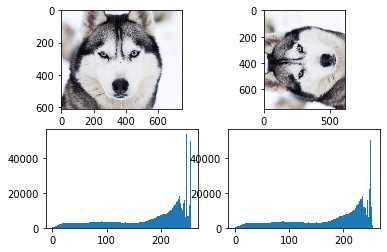

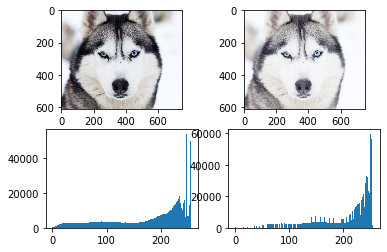

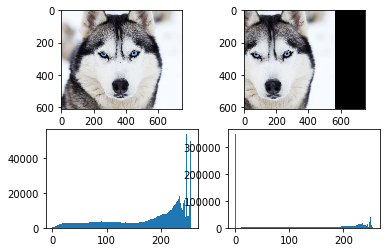

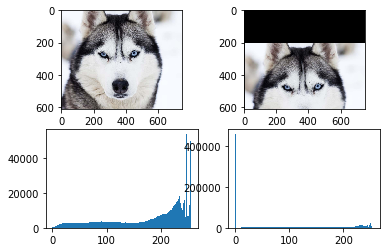

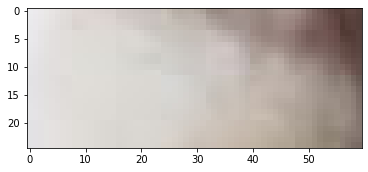

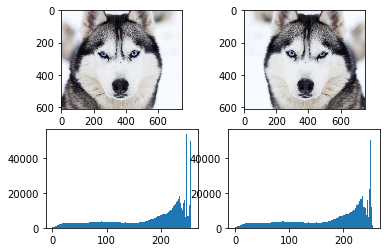

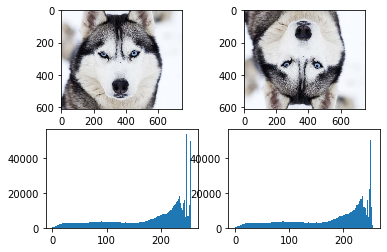

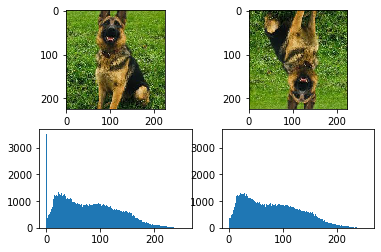

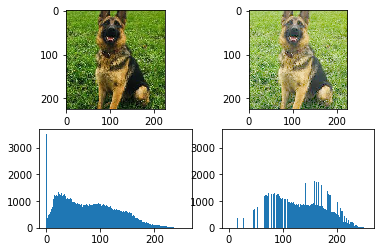

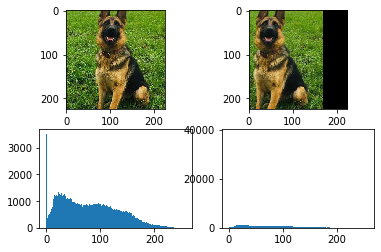

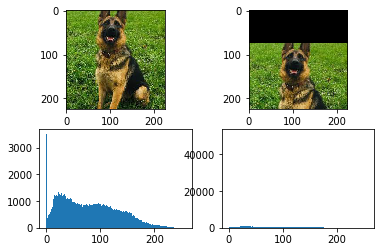

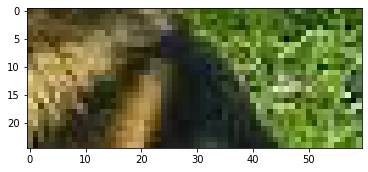

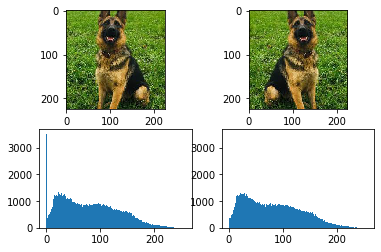

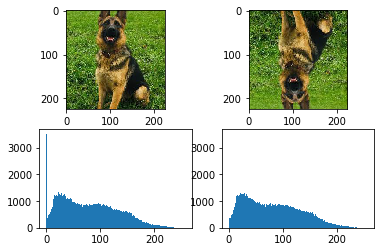

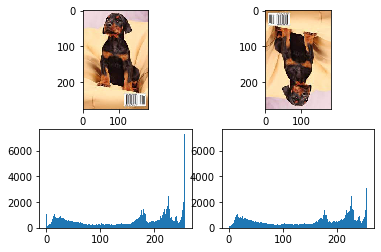

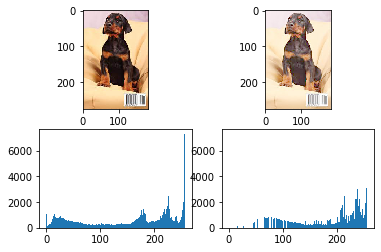

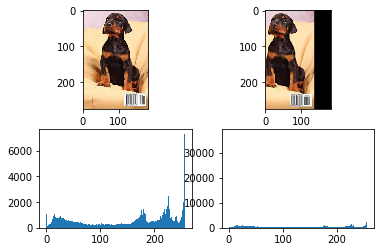

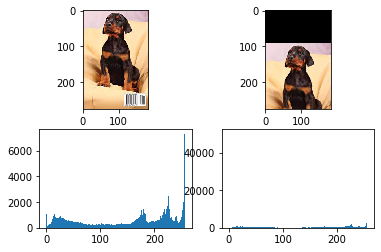

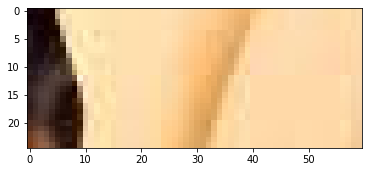

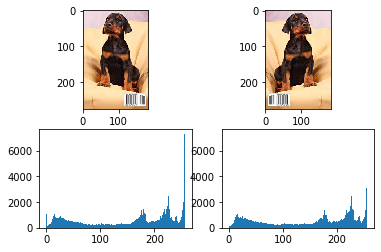

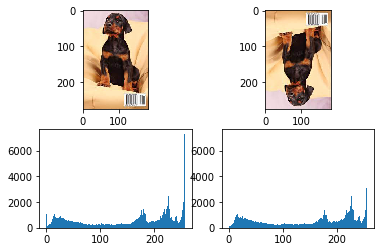

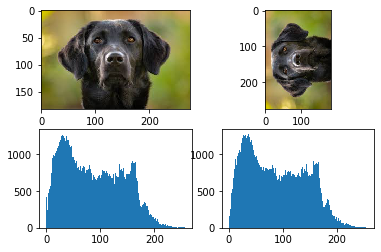

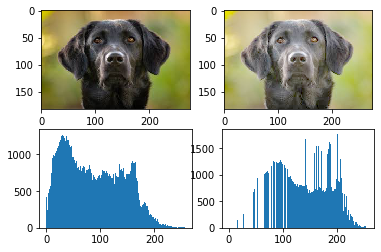

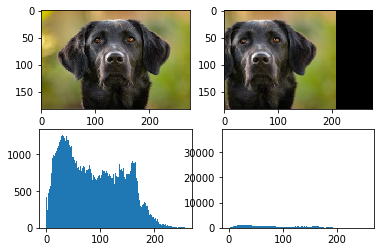

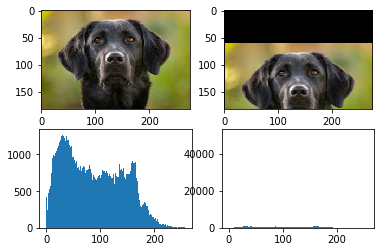

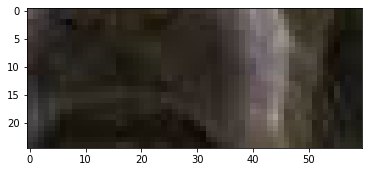

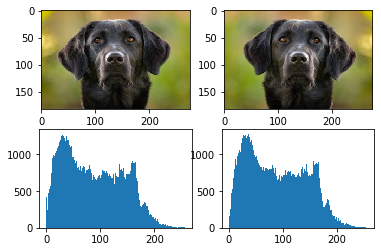

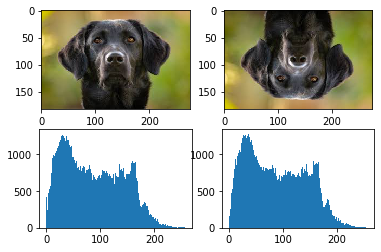

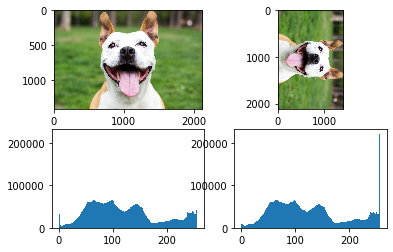

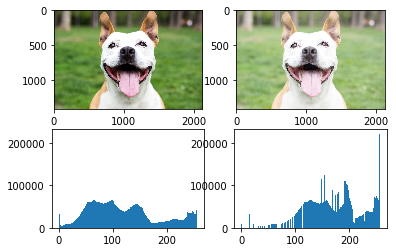

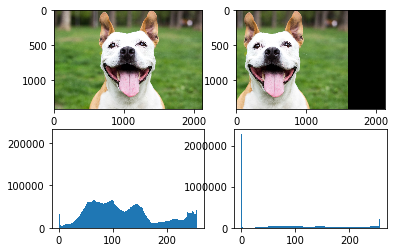

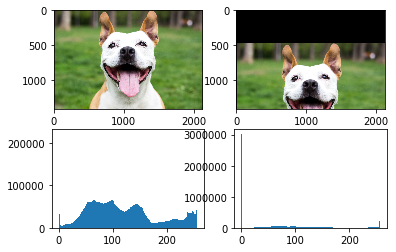

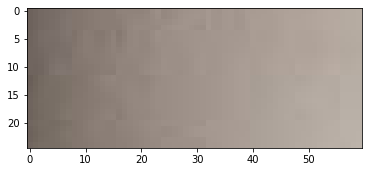

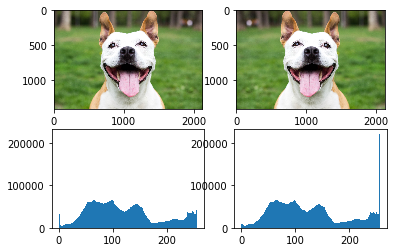

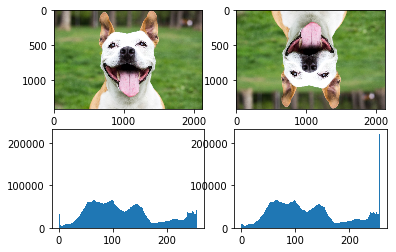

In [14]:
#dogs
directory="C:/Users/bilel/OneDrive/Documents/Documents/Dauphine/2021/sems1/python/Data_Augmentation/images/dogs"
directory_save="C:/Users/bilel/OneDrive/Documents/Documents/Dauphine/2021/sems1/python/Data_Augmentation/train/dogs/"
directory_save_test="C:/Users/bilel/OneDrive/Documents/Documents/Dauphine/2021/sems1/python/Data_Augmentation/test/dogs/"
def application_transformation(directory,directory_save,directory_save_test):
    i=0
    for filename in os.listdir(directory):
        i+=1
        image = Image.open(directory+"/"+filename)
        image=image.resize((300,300))
        image.save(directory_save+filename)
        #image = Image.open(directory+"/"+filename)
        im=np.array(Image.open(directory+"/"+filename), dtype=np.uint8)
        Image.fromarray(rotation(im)).save(directory_save+"Image_rotation"+str(i)+".jpg",'JPEG')
        Image.fromarray(random_crop(im, [100,120])).save(directory_save+"Image_crop"+str(i)+".jpg",'JPEG')
        Image.fromarray(adding_illumination(im,2)).save(directory_save+"Image_illumination"+str(i)+".jpg",'JPEG')
        Image.fromarray(translation_along_x(im)).save(directory_save+"Image_translation_along_x"+str(i)+".jpg",'JPEG')
        Image.fromarray(translation_along_y(im)).save(directory_save+"Image_translation_along_y"+str(i)+".jpg",'JPEG') 
        Image.fromarray((noise(im,0.2)* 255).astype(np.uint8)).save(directory_save+"Image_noise"+str(i)+".jpg",'JPEG') 
        Image.fromarray(zoom(im,2)).save(directory_save+"Image_zoom"+str(i)+".jpg",'JPEG')  
        Image.fromarray(cropping(im)).save(directory_save_test+"Image_cropp"+str(i)+".jpg",'JPEG') 
        #Image.fromarray(colormodification(im)).save(directory_save+"Image_colorm"+str(i)+".jpg",'JPEG') 
        Image.fromarray(Horizonta_flipping(im)).save(directory_save_test+"Image_fliph"+str(i)+".jpg",'JPEG')
        Image.fromarray(vertical_flipping(im)).save(directory_save_test+"Image_flipv"+str(i)+".jpg",'JPEG') 
application_transformation(directory,directory_save,directory_save_test)  